Analisis Penjualan Produk \
(Ni Kadek Emik Sapitri)

# Data cleaning and preparation

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_fp1 = pd.read_csv('dataset_final_project.csv')
data_fp1.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08,Ewallet,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23,Credit card,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33,Ewallet,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37,Ewallet,5.3


In [4]:
data_fp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  Rating         1000 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


## memastikan data bebas dari null values dan duplicated values

In [5]:
data_fp1.isnull().sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

In [6]:
data_fp1.duplicated().sum()

0

## ubah data string (object) menjadi category

In [7]:
columns = ['Branch', 'City', 'Customer type', 'Product line', 'Payment']

for col in columns:
    print(f"Nilai unik pada kolom {col}: {data_fp1[col].unique()}")

Nilai unik pada kolom Branch: ['A' 'C' 'B']
Nilai unik pada kolom City: ['Yangon' 'Naypyitaw' 'Mandalay']
Nilai unik pada kolom Customer type: ['Member' 'Normal']
Nilai unik pada kolom Product line: ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
Nilai unik pada kolom Payment: ['Ewallet' 'Cash' 'Credit card']


In [8]:
#mengubah data

data_fp1['Branch'].replace({'A': 1, 'B': 2, 'C': 3}, inplace=True)
data_fp1['City'].replace({'Yangon': 1, 'Naypyitaw': 2, 'Mandalay': 3}, inplace=True)
data_fp1['Customer type'].replace({'Member': 2, 'Normal': 1}, inplace=True)
data_fp1['Product line'].replace({'Electronic accessories': 1, 'Fashion accessories': 2,
                            'Food and beverages': 3, 'Health and beauty': 4, 
                            'Home and lifestyle': 5,'Sports and travel': 6}, inplace=True)
data_fp1['Payment'].replace({'Cash': 1, 'Credit card': 2, 'Ewallet': 3}, inplace=True)
data_fp1.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,1,1,2,Female,4,74.69,7,1/5/2019,13:08,3,9.1
1,226-31-3081,3,2,1,Female,1,15.28,5,3/8/2019,10:29,1,9.6
2,631-41-3108,1,1,1,Male,5,46.33,7,3/3/2019,13:23,2,7.4
3,123-19-1176,1,1,2,Male,4,58.22,8,1/27/2019,20:33,3,8.4
4,373-73-7910,1,1,1,Male,6,86.31,7,2/8/2019,10:37,3,5.3


In [9]:
#cek hasil replace

for col in columns:
    print(f"Nilai unik pada kolom {col}: {data_fp1[col].unique()}")

Nilai unik pada kolom Branch: [1 3 2]
Nilai unik pada kolom City: [1 2 3]
Nilai unik pada kolom Customer type: [2 1]
Nilai unik pada kolom Product line: [4 1 5 6 3 2]
Nilai unik pada kolom Payment: [3 1 2]


In [10]:
data_fp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   int64  
 2   City           1000 non-null   int64  
 3   Customer type  1000 non-null   int64  
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   int64  
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   int64  
 11  Rating         1000 non-null   float64
dtypes: float64(2), int64(6), object(4)
memory usage: 93.9+ KB


In [11]:
data_fp1.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Date', 'Time', 'Payment',
       'Rating'],
      dtype='object')

In [12]:
#ubah Dtype jadi category

columns = ['Branch', 'City', 'Customer type', 'Gender','Product line', 'Payment']

for col in columns:
    data_fp1[col] = data_fp1[col].astype('category')

data_fp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Invoice ID     1000 non-null   object  
 1   Branch         1000 non-null   category
 2   City           1000 non-null   category
 3   Customer type  1000 non-null   category
 4   Gender         1000 non-null   category
 5   Product line   1000 non-null   category
 6   Unit price     1000 non-null   float64 
 7   Quantity       1000 non-null   int64   
 8   Date           1000 non-null   object  
 9   Time           1000 non-null   object  
 10  Payment        1000 non-null   category
 11  Rating         1000 non-null   float64 
dtypes: category(6), float64(2), int64(1), object(3)
memory usage: 53.7+ KB


## penambahan kolom

In [13]:
data_fp1['Total'] = data_fp1['Unit price'] * data_fp1['Quantity']
data_fp1['Tax'] = data_fp1['Total'] * (5/100)
data_fp1['Final price'] = data_fp1['Total'] - data_fp1['Tax']

data_fp1.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Total,Tax,Final price
0,750-67-8428,1,1,2,Female,4,74.69,7,1/5/2019,13:08,3,9.1,522.83,26.1415,496.6885
1,226-31-3081,3,2,1,Female,1,15.28,5,3/8/2019,10:29,1,9.6,76.40,3.8200,72.5800
2,631-41-3108,1,1,1,Male,5,46.33,7,3/3/2019,13:23,2,7.4,324.31,16.2155,308.0945
3,123-19-1176,1,1,2,Male,4,58.22,8,1/27/2019,20:33,3,8.4,465.76,23.2880,442.4720
4,373-73-7910,1,1,1,Male,6,86.31,7,2/8/2019,10:37,3,5.3,604.17,30.2085,573.9615


In [14]:
data_fp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Invoice ID     1000 non-null   object  
 1   Branch         1000 non-null   category
 2   City           1000 non-null   category
 3   Customer type  1000 non-null   category
 4   Gender         1000 non-null   category
 5   Product line   1000 non-null   category
 6   Unit price     1000 non-null   float64 
 7   Quantity       1000 non-null   int64   
 8   Date           1000 non-null   object  
 9   Time           1000 non-null   object  
 10  Payment        1000 non-null   category
 11  Rating         1000 non-null   float64 
 12  Total          1000 non-null   float64 
 13  Tax            1000 non-null   float64 
 14  Final price    1000 non-null   float64 
dtypes: category(6), float64(5), int64(1), object(3)
memory usage: 77.1+ KB


# produk dari kategori manakah yang paling banyak dijual di supermarket dan berapa total barang yang berhasil dijual dari masing-masing kategori tersebut?

In [15]:
sales_percategory = data_fp1.groupby('Product line')['Quantity'].sum() 

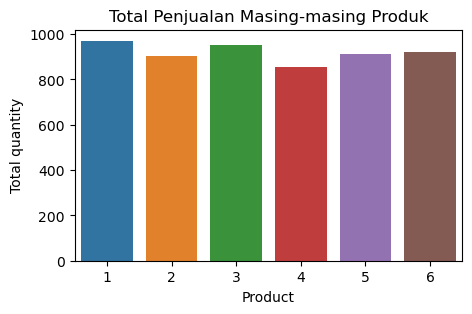

In [16]:
#barplot

plt.figure(figsize=[5,3])
sns.barplot(x = sales_percategory.index, y = sales_percategory.values, data = data_fp1)
plt.xlabel('Product')
plt.ylabel('Total quantity')
plt.title('Total Penjualan Masing-masing Produk')
plt.show()

In [17]:
data_fp1.groupby('Product line')[['Quantity']].sum() 

,Quantity
Product line,
1,971
2,902
3,952
4,854
5,911
6,920


In [18]:
sales_percategory.idxmax()

1

Ingat bahwa:
- 1 merujuk pada 'Electronic accessories' 
- 2 merujuk pada 'Fashion accessories'                            
- 3 merujuk pada'Food and beverages'
- 4 merujuk pada 'Health and beauty'
- 5 merujuk pada 'Home and lifestyle'
- 6 merujuk pada 'Sports and travel'

Dengan demikian, diperoleh informasi:
- 'Electronic accessories' terjual sebanyak 971 
- 'Fashion accessories' terjual sebanyak 902
- 'Food and beverages' terjual sebanyak 952
- 'Health and beauty' terjual sebanyak 854
- 'Home and lifestyle' terjual sebanyak 911
- 'Sports and travel' terjual sebanyak 920

Produk yang paling banyak terjual yaitu kategori 1 ('Electronic accessories')

# dari masing-masing kategori, berapa pembeli dengan tipe Normal dan Member?

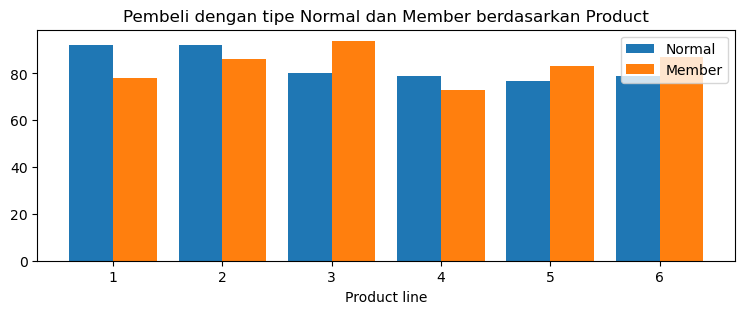

In [19]:
data_normal = data_fp1.loc[data_fp1["Customer type"] == 1]
data_member = data_fp1.loc[data_fp1["Customer type"] == 2]

group_normal = data_normal.groupby("Product line")["Customer type"].count()
group_member = data_member.groupby("Product line")["Customer type"].count()

x = np.arange(len(group_normal.index))
width = 0.4

plt.figure(figsize=[9,3])
plt.bar(x - width/2, group_normal.values, width = width, label = "Normal")
plt.bar(x + width/2, group_member.values, width = width, label = "Member")

plt.title('Pembeli dengan tipe Normal dan Member berdasarkan Product')
plt.xlabel('Product line')
plt.xticks(x, group_normal.index)  
plt.legend()
plt.show()

In [20]:
print("Tabel jumlah pembeli di masing-masing Product dan Customer type")
cust_category = data_fp1.groupby(['Product line', 'Customer type'])[['Customer type']].count() 
cust_category 

Tabel jumlah pembeli di masing-masing Product dan Customer type


Customer type
Product line Customer type               
1            1                         92
             2                         78
2            1                         92
             2                         86
3            1                         80
             2                         94
4            1                         79
             2                         73
5            1                         77
             2                         83
6            1                         79
             2                         87

# pembayaran dengan tipe apakah yang lebih disukai pembeli di supermarket?

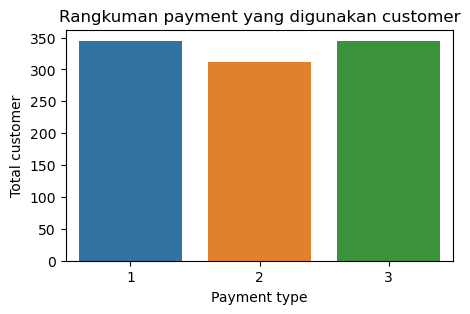

In [21]:
payment_category = data_fp1.groupby('Payment')['Payment'].count() 

#barplot

plt.figure(figsize=[5,3])
sns.barplot(x = payment_category.index, y = payment_category.values, data = data_fp1)
plt.xlabel('Payment type')
plt.ylabel('Total customer')
plt.title('Rangkuman payment yang digunakan customer')
plt.show()

In [22]:
payment_category

Payment
1    344
2    311
3    345
Name: Payment, dtype: int64

Pembayaran dengan payment tipe 3 (Ewallet) lebih disukai.

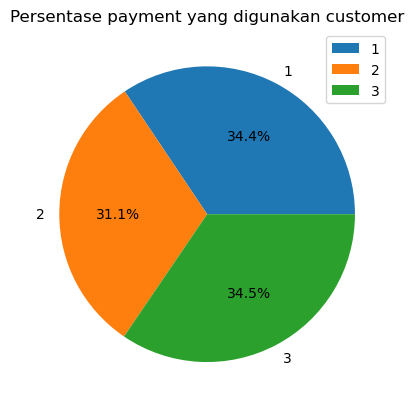

In [23]:
plt.pie(payment_category.values, labels = payment_category.index, autopct="%1.1f%%")
plt.title('Persentase payment yang digunakan customer')
plt.legend()
plt.show()

- Persentase pembeli yang membayar dengan 'Cash' (1) = 34,4%
- Persentase pembeli yang membayar dengan 'Credit card' (2) = 31,1%
- Persentase pembeli yang membayar dengan 'Ewallet' (3) = 34,5%

# berapa keuntungan supermarket dari setiap kategori dan secara keseluruhan?

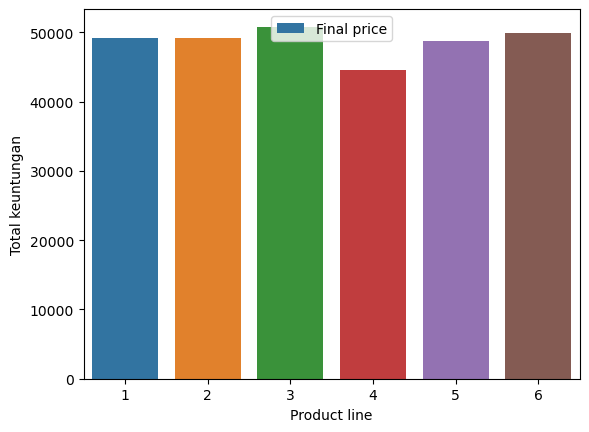

In [24]:
keuntungan = data_fp1.groupby("Product line")["Final price"].sum()

sns.barplot(x = keuntungan.index, y = keuntungan.values, label = "Final price")
plt.ylabel('Total keuntungan')
plt.legend()
plt.show()

In [25]:
keuntungan

Product line
1    49162.5285
2    49133.9050
3    50797.7160
4    44508.6210
5    48732.2070
6    49873.0335
Name: Final price, dtype: float64

Dengan demikian, keuntungan dari produk:
- 'Electronic accessories' sejumlah 49162.5285 
- 'Fashion accessories' sejumlah 49133.9050
- 'Food and beverages' sejumlah 50797.7160
- 'Health and beauty' sejumlah 44508.6210
- 'Home and lifestyle' sejumlah 48732.2070
- 'Sports and travel' sejumlah 49873.0335

Simpulan: penjualan 'Electronic accessories' paling menguntungkan dan pembayaran dengan 'Ewallet' paling disukai.